# Feature Engineering with Python Project ~ Week 4, P.M. Kuria

## 1. Defining the Question

### a) Specifying the Data Analysis Question

Sendy has hired you to help predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at the final destination. 

### b) Understanding the Context

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa. The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions to providing dedicated support for goods on the move.


Dataset Information
The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. The challenge is to predict the estimated time of arrival for orders- from pick-up to drop-off. The dataset provided here is a subset of over 20,000 orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi. All data in this subset have been fully anonymized while preserving the distribution.

Dataset URL = https://bit.ly/3deaKEM

Dataset Glossary = https://bit.ly/30O3xsr

Hint

Create your base model (ensemble regressor), then later improve the accuracy of the
base model by performing the following feature engineering techniques:

● Feature improvement

○ Handle categorical features

○ Find and deal with missing values

○ Handle any outliers in your dataset

● Feature scaling (normalisation or standardisation etc.)

● Feature construction

○ Create new features i.e. speed = distance/time, manhattan distance from pick up latitude and Longitude i.e. manhattan distance, haversine distance, bearing, centre point etc.

● Feature Selection

○ Filter methods

○ Feature transformation (PCA, LDA, etc)

○ Wrapper methods


### c) Recording the Experimental Design


● Data Importation

● Data Exploration

● Data Preparation

● Feature Enginnering

● Data Modeling

● Model Evaluation


● Findings and Recommendations

### d) Metric of success

An accurate arrival time prediction will help all business to improve their logistics and communicate the accurate time their time to their customers

#Data Importation

##Load Libraries

In [1]:
#Let us first import the relevant libraries
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
%matplotlib inline

# Machine learning 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Load Data

In [3]:
# Import each csv file
test_raw = pd.read_csv('Test.csv')
train_raw = pd.read_csv('Train.csv')
riders_raw = pd.read_csv('Riders.csv')

# Join riders to test & train data and initialise working dataframes
train = pd.merge(train_raw, riders_raw, on="Rider Id", how="left") 
test = pd.merge(test_raw, riders_raw, how="left", on="Rider Id")
print(train.head())
print(test.head())

         Order No       User Id Vehicle Type  Platform Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal or Business  Placement - Day of Month  \
0             Business                         9   
1             Personal                        12   
2             Business                        30   
3             Business                        15   
4             Personal                        13   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             5       9:35:46 AM                            9   
1                             5      11:16:16 AM                           12   
2                             2      12:39:25 PM                 

# Data Exploration: Exploratory Data Analysis (EDA)

In [4]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [5]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [6]:
riders_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


Observations:

Both the train & test data sets have missing values for the 'Temperature' & 'Precipitation' columns. The missing values should be imputed using an appropriate method. Approximately 20% of the Temperature values are missing in both the Test & Train data sets. Replacing the NaN values with the average could therefore be a reasonable assumption. Approximately 97% of the Precipitation values are missing. Imputation of the NaN values could be achieved either via assuming zero precipitation for those Order times, or imputation by mode.

As the data has already been split into train and test sets we can go ahead and impute the values for each set. It is best practice to impute values after the split to prevent data leakage and ensure a fair test of the model.

The riders.csv file has no missing values. Phew!

There a few object types in each dataframe which need to either be converted into numeric types or potentially dropped from the data set. The time variables are currently object types and require conversion into DateTime.

Summary: impute missing temperature and precipitation values. Join riders to both test & train.

## Data Cleaning

In [7]:
def col_names_without_spaces(df):
  """
  This function removes spaces in column names by replacing them with underscores 
  and converts all uppercase letters to lowercase.

  arguments: 
  df: original Pandas DataFrame

  Returns:
  Modified DataFrame
  """

  df.columns = [col.replace(" ","_") for col in df.columns] 
  df.columns = [col.lower() for col in df.columns]
  return df

col_names_without_spaces(train)
col_names_without_spaces(test)

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_-_day_of_month,placement_-_weekday_(mo_=_1),placement_-_time,confirmation_-_day_of_month,confirmation_-_weekday_(mo_=_1),...,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,Order_No_3612,User_Id_2587,Bike,3,Business,7,1,10:35:49 AM,7,1,...,NaN,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_362,1018,504,13.1,87
7064,Order_No_7657,User_Id_3547,Bike,3,Business,10,3,2:59:42 PM,10,3,...,NaN,-1.276141,36.771084,-1.316098,36.913164,Rider_Id_669,6728,2702,13.9,2027
7065,Order_No_1969,User_Id_136,Bike,3,Business,5,3,2:45:12 PM,5,3,...,NaN,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379,1601,1337,13.7,441
7066,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,3:18:26 PM,29,2,...,NaN,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474,225,878,14.1,66


In [8]:
train.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_-_day_of_month,placement_-_weekday_(mo_=_1),placement_-_time,confirmation_-_day_of_month,confirmation_-_weekday_(mo_=_1),...,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


## Data *Visualization*

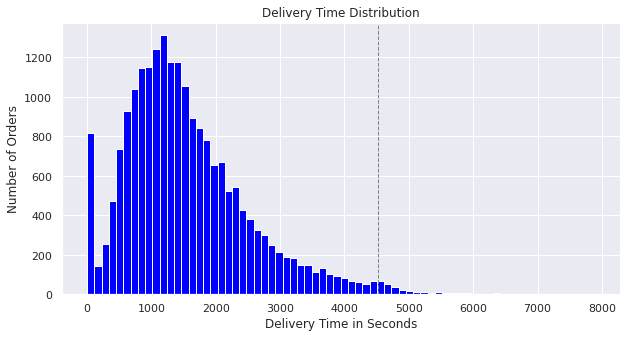

In [9]:
# Calculating the outlier threshold 
mu = train['time_from_pickup_to_arrival'].mean()
sd = train['time_from_pickup_to_arrival'].std()
outlier_threshold = mu + 3*sd

# Creating the histogram - distribution of delivery times in seconds
sns.set()
_ = plt.figure(figsize=(10,5))
_ = plt.hist(train['time_from_pickup_to_arrival'], bins=70, color='blue')
_ = plt.title('Delivery Time Distribution')
_ = plt.xlabel('Delivery Time in Seconds')
_ = plt.ylabel('Number of Orders')
_ = plt.axvline(outlier_threshold, color='gray', linestyle='dashed', linewidth=1)


Observations:

From the plot above it is clear that the delivery times are positively skewed, with the majority of orders being delivered in approximately 16 minutes.

There are orders with a delivery time of 1 second which is unusual and warrants further investigation.

The grey dotted line above indicates the threshold for existence of outliers (measured by the presence of values 3 standard deviations away from the mean.) A small portion of the delivery times recorded with times > 4500 seconds could be considered outliers.

''

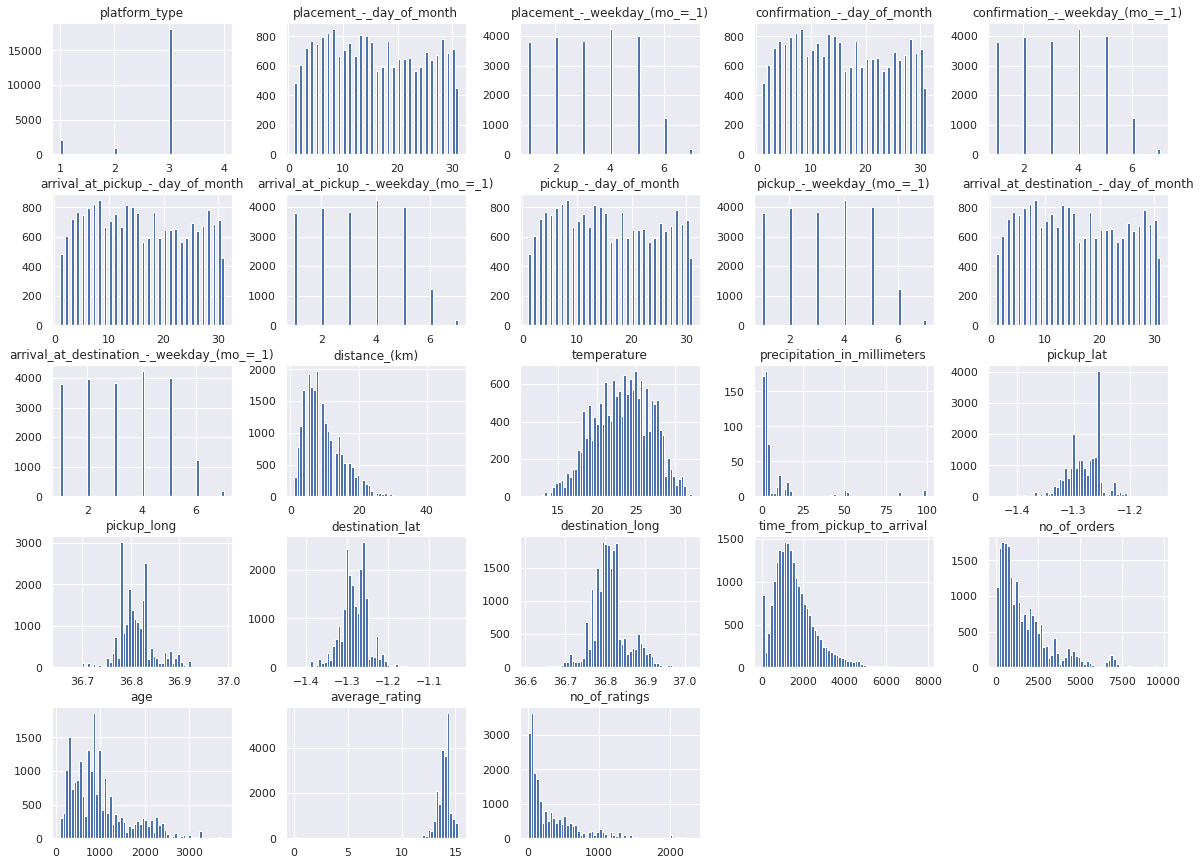

In [10]:
# Create histograms to visulize the distribution of each feature
sns.set()
train.hist(bins=60, figsize=(20,15))

Observations:

The majority of orders are placed using Platform 3.
Orders and deliveries decline on weekends.
Most orders are delivered within a 10 km radius from the Pickup location.
Most Temperatures range between 20 and 27 degrees Celsius.
The average driver rating is between 13 and 15.
A large proportion of riders have no or very few ratings.

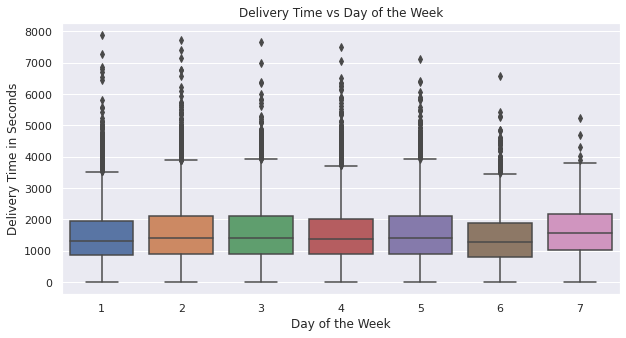

In [11]:
# Delivery time vs Day of the week
sns.set()
_ = plt.figure(figsize=(10,5))
_ = sns.boxplot(x=train['placement_-_weekday_(mo_=_1)'], 
                y=train['time_from_pickup_to_arrival'], 
                data=train)

_ = plt.title('Delivery Time vs Day of the Week')
_ = plt.xlabel('Day of the Week')
_ = plt.ylabel('Delivery Time in Seconds')

Observations:

Delivery times during the week have the same spread from Monday to Friday with slight differences in the extremity of outliers.

The delivery times during weekends have less variability and less extreme outliers. This could possibly be due to drivers experiencing less traffic over weekends.

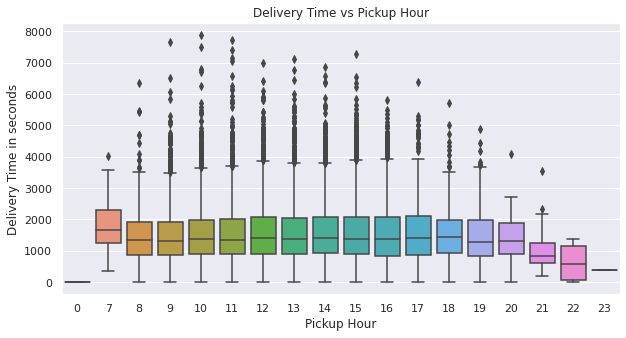

In [12]:
# delivery time vs pickup hour

# Create a copy of the train data to preserve original dataframe
t = train.copy()

# Convert to datetime and then convert to hour 
t['hour'] = pd.to_datetime(t['pickup_-_time']).dt.hour

# Plot the boxplot for the delivery time vs pickup hour
sns.set()
_ = plt.figure(figsize=(10,5))
_ = sns.boxplot(x=t['hour'], 
                y=t['time_from_pickup_to_arrival'], 
                data=t)

_ = plt.title('Delivery Time vs Pickup Hour')
_ = plt.xlabel('Pickup Hour')
_ = plt.ylabel('Delivery Time in seconds')

Observations:

The slowest delivery times are experienced between 7 and 8. This corresponds to peak morning traffic.

Orders picked up in the evening between 21 and 11 have the fastest delivery times since drivers will experience little to no traffic during these hours

The spread of delivery time for orders picked up between 8 and 8 are similar apart from a few outliers.

Text(0.5, 1.0, 'Correlation between variables in the train data')

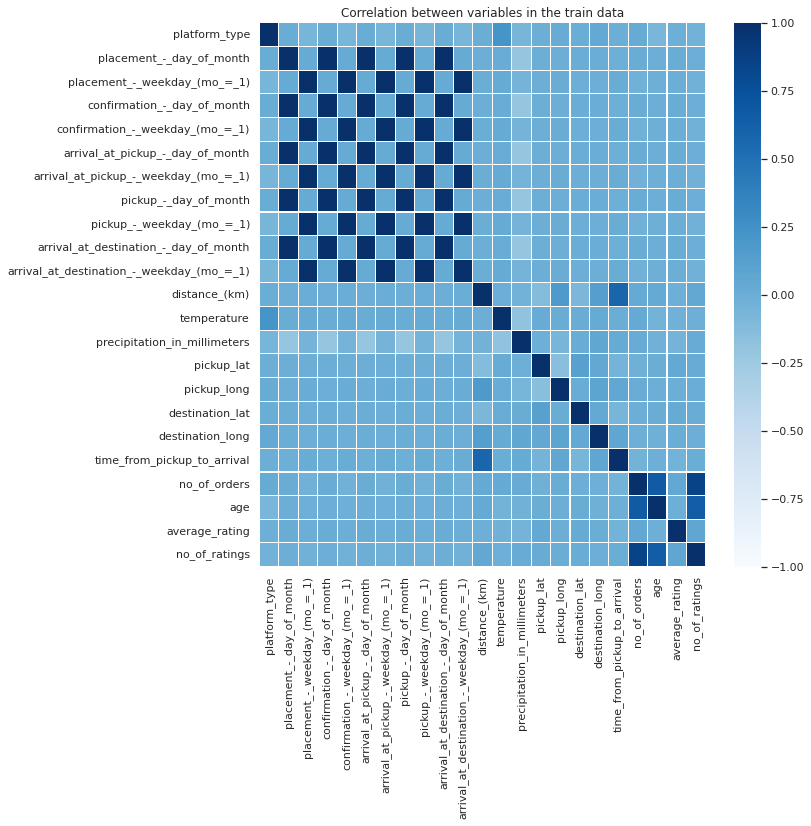

In [13]:
#Checking for Multicolinearity
Corr_Matrix = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr_Matrix, vmin=-1, vmax=1, cmap='Blues', annot=False, linewidth=0.1)
plt.title('Correlation between variables in the train data')

Observations:

The day of the month and day of the week columns for the different stages in the delivery process have a strong correlation (> 0.99). This is more confirmation that the information is repetitive and can be represented by one column for the day of the month and another for the day of the week.

The number of ratings and age columns are highly correlated. An option to handle this would be to employ feature engineering on these metrics or rule out linear regression due to correlation of these predictor variables. (discussed further in model selection).

Precipitation is slightly correlated to temperature and day of the month

# Feature Selection

In [14]:
# List of all the column names to be dropped from the train and test data
to_drop = ['order_no', 
           'user_id', 
           'vehicle_type', 
           'rider_id', 
           'confirmation_-_day_of_month', 
           'confirmation_-_weekday_(mo_=_1)', 
           'confirmation_-_time', 
           'arrival_at_pickup_-_day_of_month', 
           'arrival_at_pickup_-_weekday_(mo_=_1)', 
           'arrival_at_pickup_-_time', 
           'pickup_-_day_of_month', 
           'pickup_-_weekday_(mo_=_1)']

# Columns that should be dropped from the train data only
x_drop = ['arrival_at_destination_-_time', 
          'arrival_at_destination_-_weekday_(mo_=_1)', 
          'arrival_at_destination_-_day_of_month']

# Drop from train and test
test.drop(to_drop, axis=1, inplace=True)
train.drop(to_drop, axis=1, inplace=True)
train.drop(x_drop, axis=1, inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   platform_type                 21201 non-null  int64  
 1   personal_or_business          21201 non-null  object 
 2   placement_-_day_of_month      21201 non-null  int64  
 3   placement_-_weekday_(mo_=_1)  21201 non-null  int64  
 4   placement_-_time              21201 non-null  object 
 5   pickup_-_time                 21201 non-null  object 
 6   distance_(km)                 21201 non-null  int64  
 7   temperature                   16835 non-null  float64
 8   precipitation_in_millimeters  552 non-null    float64
 9   pickup_lat                    21201 non-null  float64
 10  pickup_long                   21201 non-null  float64
 11  destination_lat               21201 non-null  float64
 12  destination_long              21201 non-null  float64
 13  t

# Feature Engineering


In [17]:
# Extract the hour from the time for both the train and test datasets
train['pickup_-_time'] = pd.to_datetime(train['pickup_-_time'])
train['placement_-_time'] = pd.to_datetime(train['placement_-_time'])
test['pickup_-_time'] = pd.to_datetime(test['pickup_-_time'])
test['placement_-_time'] = pd.to_datetime(test['placement_-_time'])

# Calculate the waiting time
train['waiting_time'] = train['pickup_-_time'] - train['placement_-_time']
test['waiting_time'] = test['pickup_-_time'] - test['placement_-_time']

# Convert waiting time from time_delta to seconds 
train['waiting_time'] = train['waiting_time'].astype('timedelta64[s]')
test['waiting_time'] = test['waiting_time'].astype('timedelta64[s]')


## Cyclical Features

Time, days of the week and days of the month are all cyclical features and should be interpreted by machine learning models accordingly.


In [18]:
# Convert the day of the month to a cyclical feature

# Train
train['month_sin'] = np.sin((train['placement_-_day_of_month']-1)*(2.*np.pi/30.5))
train['month_cos'] = np.cos((train['placement_-_day_of_month']-1)*(2.*np.pi/30.5))

# Test
test['month_sin'] = np.sin((test['placement_-_day_of_month']-1)*(2.*np.pi/30.5))
test['month_cos'] = np.cos((test['placement_-_day_of_month']-1)*(2.*np.pi/30.5))

In [19]:
# Convert the weekday to a cyclical feature

# Train
train['day_sin'] = np.sin((train['placement_-_weekday_(mo_=_1)']-1)*(2.*np.pi/7))
train['day_cos'] = np.cos((train['placement_-_weekday_(mo_=_1)']-1)*(2.*np.pi/7))

# Test
test['day_sin'] = np.sin((test['placement_-_weekday_(mo_=_1)']-1)*(2.*np.pi/7))
test['day_cos'] = np.cos((test['placement_-_weekday_(mo_=_1)']-1)*(2.*np.pi/7))

In [20]:
# Convert the pickup time to date_time format and extracting the hour
train['pickup_-_time'] = pd.to_datetime(train['pickup_-_time']).dt.hour
test['pickup_-_time'] = pd.to_datetime(test['pickup_-_time']).dt.hour

# Convert pickup time to cyclical feature

# Train
train['hr_sin'] = np.sin(train['pickup_-_time']*(2.*np.pi/24))
train['hr_cos'] = np.cos(train['pickup_-_time']*(2.*np.pi/24))

# Test
test['hr_sin'] = np.sin(test['pickup_-_time']*(2.*np.pi/24))
test['hr_cos'] = np.cos(test['pickup_-_time']*(2.*np.pi/24))

In [21]:
# List of column names to drop
drop = ['placement_-_time', 
        'pickup_-_time',
        'placement_-_weekday_(mo_=_1)', 
        'placement_-_day_of_month']

# Drop columns
test.drop(drop, axis=1, inplace=True)
train.drop(drop, axis=1, inplace=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   platform_type                 21201 non-null  int64  
 1   personal_or_business          21201 non-null  object 
 2   distance_(km)                 21201 non-null  int64  
 3   temperature                   16835 non-null  float64
 4   precipitation_in_millimeters  552 non-null    float64
 5   pickup_lat                    21201 non-null  float64
 6   pickup_long                   21201 non-null  float64
 7   destination_lat               21201 non-null  float64
 8   destination_long              21201 non-null  float64
 9   time_from_pickup_to_arrival   21201 non-null  int64  
 10  no_of_orders                  21201 non-null  int64  
 11  age                           21201 non-null  int64  
 12  average_rating                21201 non-null  float64
 13  n

# Data Preparation and Further Clean up

In [23]:
#Imputation of Missing Values
# Check % null values for precipitation
prec_nulls_perc_train = round((train['precipitation_in_millimeters'].isnull().sum()*100)/len(train),2)
prec_nulls_perc_test = round((test['precipitation_in_millimeters'].isnull().sum()*100)/len(test),2)

print(round(prec_nulls_perc_train))
print(round(prec_nulls_perc_train))


97
97


In [24]:
# Fill precipitation null values with 0
train['precipitation_in_millimeters'].fillna(0,inplace=True)
test['precipitation_in_millimeters'].fillna(0,inplace=True)

In [25]:
# Replace Null values in the temperature column with the average value 
imputer_temp = SimpleImputer(missing_values=np.NaN, strategy='mean')
imputer_temp_1 = SimpleImputer(missing_values=np.NaN, strategy='mean')

# Train 
imputer_temp.fit(train.iloc[:,2:4])
train.iloc[:,2:4] = imputer_temp.transform(train.iloc[:,2:4])

# Test
imputer_temp_1.fit(test.iloc[:,2:4])
test.iloc[:,2:4] = imputer_temp_1.transform(test.iloc[:,2:4])

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   platform_type                 21201 non-null  int64  
 1   personal_or_business          21201 non-null  object 
 2   distance_(km)                 21201 non-null  float64
 3   temperature                   21201 non-null  float64
 4   precipitation_in_millimeters  21201 non-null  float64
 5   pickup_lat                    21201 non-null  float64
 6   pickup_long                   21201 non-null  float64
 7   destination_lat               21201 non-null  float64
 8   destination_long              21201 non-null  float64
 9   time_from_pickup_to_arrival   21201 non-null  int64  
 10  no_of_orders                  21201 non-null  int64  
 11  age                           21201 non-null  int64  
 12  average_rating                21201 non-null  float64
 13  n

In [27]:
# Convert the 'platform type' data type to category
train['platform_type'] = train['platform_type'].astype('category')
test['platform_type'] = test['platform_type'].astype('category')

# Encode categorical data
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [28]:
test.head()

,distance_(km),temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,no_of_orders,age,average_rating,...,month_sin,month_cos,day_sin,day_cos,hr_sin,hr_cos,platform_type_2,platform_type_3,platform_type_4,personal_or_business_Personal
0,8.0,23.24612,0.0,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,...,-0.799839,0.600214,0.974928,-0.222521,-0.965926,-0.258819,0,1,0,0
1,5.0,23.24612,0.0,-1.272639,36.794723,-1.277007,36.823907,488,273,14.4,...,-0.153891,-0.988088,-0.433884,-0.900969,-0.258819,-0.965926,0,1,0,0
2,5.0,22.80000,0.0,-1.290894,36.822971,-1.276574,36.851365,833,460,13.1,...,-0.799839,0.600214,0.433884,-0.900969,0.258819,-0.965926,0,1,0,0
3,5.0,24.50000,0.0,-1.290503,36.809646,-1.303382,36.790658,487,560,13.7,...,-0.153891,-0.988088,0.000000,1.000000,-0.500000,-0.866025,0,1,0,0
4,6.0,24.40000,0.0,-1.281081,36.814423,-1.266467,36.792161,4761,1120,14.1,...,0.882679,-0.469977,0.781831,0.623490,0.258819,-0.965926,0,1,0,0


## Split Train Data into Train and Test sets

In [30]:
# Seperate the features and target variables
X = train.copy()
X.drop('time_from_pickup_to_arrival', axis=1, inplace=True)
y = train['time_from_pickup_to_arrival']

# Split the data in a test and train set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=101 )


## Feature Scaling/Normalization

In [31]:
# Initialise variables to be scaled 
X_train_s = X_train.copy()
X_test_s = X_test.copy()
test_s = test.copy()

# List of column names with variables that should be scaled
col_names = ['distance_(km)', 
             'temperature', 
             'precipitation_in_millimeters',
             'pickup_lat', 
             'pickup_long', 
             'destination_lat', 
             'destination_long',
             'no_of_orders', 
             'age', 
             'average_rating', 
             'no_of_ratings',
             'waiting_time', 
             'month_sin', 
             'month_cos', 
             'day_sin', 
             'day_cos',
             'hr_sin', 
             'hr_cos']

# X_Train data
train_features = X_train_s[col_names]
train_scaler = StandardScaler().fit(train_features.values)
train_features = train_scaler.transform(train_features.values)
X_train_s[col_names] = train_features

# X_Test data (validation set)
X_test_features = X_test_s[col_names]
X_test_features = train_scaler.fit_transform(X_test_features.values)
X_test_s[col_names] = X_test_features

# Test data (Zindi Test set)
test_features = test_s[col_names]
test_features = train_scaler.fit_transform(test_features.values)
test_s[col_names] = test_features

test_s.head()

,distance_(km),temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,no_of_orders,age,average_rating,...,month_sin,month_cos,day_sin,day_cos,hr_sin,hr_cos,platform_type_2,platform_type_3,platform_type_4,personal_or_business_Personal
0,-0.261685,0.000000,-0.071986,-1.705347,1.571875,-0.671685,0.254311,-0.784681,0.762630,-0.689113,...,-1.180484,0.848738,1.213417,-0.162228,-1.451525,2.060800,0,1,0,0
1,-0.799773,0.000000,-0.071986,0.313017,-0.432695,0.153311,0.289179,-0.754597,-1.079228,0.610704,...,-0.270503,-1.409575,-1.156449,-1.059014,-0.168206,-0.745803,0,1,0,0
2,-0.799773,-0.139191,-0.071986,-0.294630,0.311474,0.165960,0.920333,-0.542775,-0.801015,-0.925443,...,-1.180484,0.848738,0.303287,-1.059014,0.771249,-0.745803,0,1,0,0
3,-0.799773,0.391215,-0.071986,-0.281625,-0.039556,-0.617144,-0.475089,-0.755211,-0.652238,-0.216452,...,-0.270503,-1.409575,-0.426581,1.453725,-0.605922,-0.349285,0,1,0,0
4,-0.620410,0.360014,-0.071986,0.032021,0.086282,0.461188,-0.440536,1.868924,0.180913,0.256208,...,1.189764,-0.672903,0.888595,0.956046,0.771249,-0.745803,0,1,0,0


# Data Modelling : Machine Learning Modelling, Evaluation

In [32]:
# Building a linear regression model 
lm = LinearRegression()
lm.fit(X_train,y_train)

# Building a decision tree regression model 
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# Building a random forest regression model 
forest = RandomForestRegressor(n_estimators=500)
forest.fit(X_train, y_train)

# Building ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_s,y_train) 

# Building Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_s, y_train)

Lasso(alpha=0.1)

## Model Evaluation

In [33]:
# Multiple linear regression
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred_test)),2)
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)),2)

# Decision Tree regression
y_pred_test_tree = tree.predict(X_test)
y_pred_train_tree = tree.predict(X_train)
rmse_test_tree = round(np.sqrt(mean_squared_error(y_test, y_pred_test_tree)),2)
rmse_train_tree = round(np.sqrt(mean_squared_error(y_train, y_pred_train_tree)),2)

# Random forest regression 
y_pred_test_forest = forest.predict(X_test)
y_pred_train_forest = forest.predict(X_train)
rmse_test_forest = round(np.sqrt(mean_squared_error(y_test, y_pred_test_forest)),2)
rmse_train_forest = round(np.sqrt(mean_squared_error(y_train, y_pred_train_forest)),2)

# Ridge regression
y_pred_ridge_train = ridge.predict(X_train_s)
y_pred_ridge_test = ridge.predict(X_test_s)
rmse_test_ridge = round(np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)),2)
rmse_train_ridge = round(np.sqrt(mean_squared_error(y_train, y_pred_ridge_train)),2)

# Lasso regression
y_pred_lasso_train = lasso.predict(X_train_s)
y_pred_lasso_test = lasso.predict(X_test_s)
rmse_test_lasso = round(np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)),2)
rmse_train_lasso = round(np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)),2)

# Dictionary linking the train and test (validation) rmse results to each corresponding model
data = {'Regression model':  ['Mulitiple linear', 'Decision Tree', 'Random Forest', 'Ridge', 'Lasso'],
        'RMSE Training': [rmse_train, rmse_train_tree, rmse_train_forest, rmse_train_ridge, rmse_train_lasso],
        'RMSE Testing' : [rmse_test, rmse_test_tree, rmse_test_forest, rmse_test_ridge, rmse_test_lasso]
        }

# Display results
df = pd.DataFrame (data, columns=['Regression model', 'RMSE Training', 'RMSE Testing'])
df.head()

,Regression model,RMSE Training,RMSE Testing
0,Mulitiple linear,798.15,781.11
1,Decision Tree,0.00,1111.49
2,Random Forest,284.21,756.08
3,Ridge,798.15,780.70
4,Lasso,798.15,780.72


# Findings and Recommendations

## Findings

* The Decision Tree model performed the best on train data however, has the largest test error, an indication of overfitting. This can be improved by hyperparmeter tuning. Finding the optimal maximum depth reduces the degree of overfitting. Using a maximum depth of 5 significantly improved the model, decreasing the testing RMSE to 780.

* The Multiple Linear Regression model performed consistently on both train and test data (lowest variance) and also performed better with the unseen data set.

* The Random Forest model has the lowest Train Error and the lowest RMSE on the unseen data. The Random Forest model was therefore selected as the final model.

* As distance travelled between pickup and delivery increases so does time taken to traverse that distance.
* Because rating a rider is optional for a customer, a customer would be more inclined to rate a rider/order when they've experienced bad service or poor delivery times than expected, thus perhaps explaining this positive correlation with Time from Pickup to Arrival.
* Business orders account for 80% of total orders and as the Company may have obligations to fill in terms of their business client deliveries, these may be prioritised over personal orders for off peak traffic hours.
* The No of Orders a rider has delivered is a measure of experience thus explaining the negative correlation - a more experienced and established Rider would generally mean a shorter delivery time.

## Recommendations



*   Random Forest was a better model choice as linear regression models are sensitive to outliers which were present in both train and test data.

* Linear regression models makes assumptions about the nature of the data. One of these assumptions is that no multicollinearity exists between variables. From the heatmap produced in the EDA we saw that the rider metrics were all strongly correlated features. Random forest regression, however, makes no assumptions about the data and handles categorical data well.

*   More training data with less bias will increase the accuracy of the model

* 740 observations were found to have unusual delivery times. This raised some concerns around the quality of the training dataset.It is recommended that the source of these errors is identified or more rigourous data cleaning that would drop these entries with unrealistic delivery times from the data set before the train-test split.

*   Hyper paramter tuning is required in order to improve model accuracy.




